In [1]:
import os
os.chdir(r'C:\Users\user\Desktop\DS - Course\File - 8')

In [2]:
Exercise 1: Graphical EDA
    


('building_rents.csv', <http.client.HTTPMessage at 0x23d04cc7b48>)

In [4]:
import pandas as pd
building=pd.read_csv('building_rents.csv')
building.head()

,fips2010,fmr_0,fmr_1,fmr_2,fmr_3,fmr_4,state,metro_code,areaname,county,cousub,countyname,county_town_name,pop2010,acs_2017_2,state_alpha,fmr_type,metro,fmr_pct_chg,fmr_dollar_chg
0,100199999,588,691,829,1055,1451,1,METRO33860M33860,"Montgomery, AL MSA",1,99999,Autauga County,Autauga County,54571.0,822,AL,40,1,0.008516,7
1,100399999,729,762,879,1280,1471,1,METRO19300M19300,"Daphne-Fairhope-Foley, AL MSA",3,99999,Baldwin County,Baldwin County,182265.0,977,AL,40,1,-0.100307,-98
2,100599999,491,494,657,824,929,1,NCNTY01005N01005,"Barbour County, AL",5,99999,Barbour County,Barbour County,27457.0,671,AL,40,0,-0.020864,-14
3,100799999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",7,99999,Bibb County,Bibb County,22915.0,866,AL,40,1,0.018476,16
4,100999999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",9,99999,Blount County,Blount County,57322.0,866,AL,40,1,0.018476,16


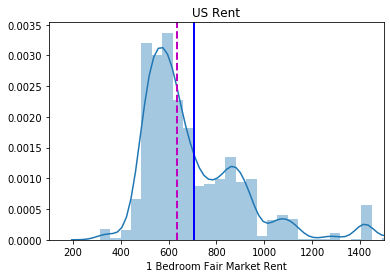

In [9]:
# Create a figure and axes. Then plot the data

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mean=np.mean(building['fmr_1'])
median=np.median(building['fmr_1'])

a=sns.distplot(building['fmr_1'])

# Customize the labels and limits
a.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
a.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
a.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
a.legend()
plt.show()

# Exercise : Bernoulli Trials
    
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.


How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation

You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

In [59]:
import numpy as np
def ber_trial(n,p):
    n_success=0
    for i in range(n):
        rand_num=[np.random.random()]
        if rand_num<p:
            n_success +=1
    return n_success    

In [100]:
ber_trial(5, 0.8)

4

In [110]:
from itertools import combinations
a=(0,1)
b=(0,1)
c=combinations([1,2,3,4,5],5)
for i in c:
    print (i)

(1, 2, 3, 4, 5)


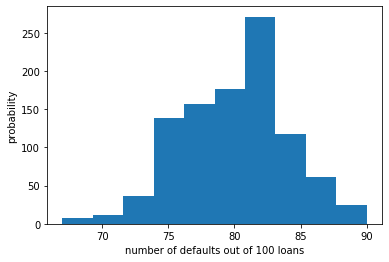

In [139]:
import matplotlib.pyplot as plt
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = ber_trial(100,0.8)
    


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

<BarContainer object of 6 artists>

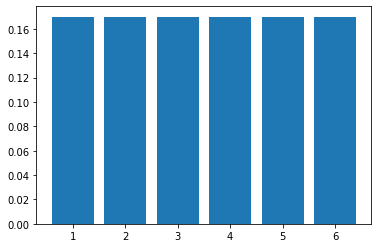

In [148]:
u=[0.17, 0.17, 0.17, 0.17, 0.17, 0.17]

b=np.arange(1,7)
plt.bar(b,u)

In [146]:
b

array([0, 1, 2, 3, 4, 5])

In [ ]:
out=np.arange(2,13)
pr=[0.03, ]

In [154]:
a=[1,2,3,4,5,6]
b=[1,2,3,4,5,6]

import itertools

a=list(itertools.product(*[a,b]))

In [157]:
b=[sum(tup) for tup in a]
len(b)

36

In [163]:
from collections import Counter
c=dict(Counter(b))
c

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

In [169]:
total=sum(c.values())

new={k:v/total for k,v in c.items()}
new

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

<BarContainer object of 11 artists>

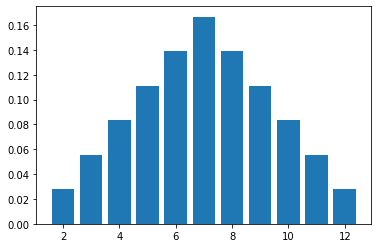

In [173]:
lists=sorted(new.items())
x,y=zip(*lists)
plt.bar(x,y)